## MANNING PROJECTS - Demographic Data Analysis

In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Data visualizations

In [2]:
folder_path = r'C:\Users\igord\Projects\Manning\Life_exp\csv\output'

In [3]:
separator = '\\'

In [4]:
file_list = os.listdir(folder_path)

In [5]:
file_list

['Area.csv',
 'Crime.csv',
 'Edu.csv',
 'Income.csv',
 'Life_Exp.csv',
 'Region.csv']

Custom service functions

In [6]:
area = pd.read_csv(folder_path + separator + file_list[0])

In [7]:
crime = pd.read_csv(folder_path + separator + file_list[1])

In [8]:
edu = pd.read_csv(folder_path + separator + file_list[2])

In [9]:
income = pd.read_csv(folder_path + separator + file_list[3])

In [10]:
life = pd.read_csv(folder_path + separator + file_list[4])

In [11]:
region = pd.read_csv(folder_path + separator + file_list[5])

#### Merging all together

In [12]:
total = area.merge(crime, how = 'inner')

In [13]:
total = total.merge(edu, how = 'inner')

In [14]:
total = total.merge(income, how = 'inner')

In [15]:
total = total.merge(life, how = 'inner')

In [16]:
total = total.merge(region, how = 'inner')

In [17]:
total.head(2)

,State,TotalRank,TotalSqMi,TotalKmQ,LandRank,LandSqMi,LandKmQ,LandPer,WaterRank,WaterSqMi,...,Income2009,Income2008,Income2007,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division
0,Alabama,30,52420.07,135767,28,50645.33,131171,96.61,23,1774.74,...,40489,42666,40554,75.40,75.40,72.60,78.10,AL,South,East South Central
1,Alaska,1,665384.04,1723337,1,570640.95,1477953,85.76,1,94743.10,...,66953,68460,64333,78.80,78.00,76.70,81.20,AK,West,Pacific


In [18]:
total['Region'] = pd.Categorical(total['Region'], ordered = False)

In [19]:
total['Division'] = pd.Categorical(total['Division'], ordered = False)

In [20]:
total.set_index('State', inplace = True)

In [21]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   TotalRank                     50 non-null     int64   
 1   TotalSqMi                     50 non-null     float64 
 2   TotalKmQ                      50 non-null     int64   
 3   LandRank                      50 non-null     int64   
 4   LandSqMi                      50 non-null     float64 
 5   LandKmQ                       50 non-null     int64   
 6   LandPer                       50 non-null     float64 
 7   WaterRank                     50 non-null     int64   
 8   WaterSqMi                     50 non-null     float64 
 9   WaterKmQ                      50 non-null     int64   
 10  WaterPer                      50 non-null     float64 
 11  Population_total              50 non-null     int64   
 12  Murders_and_Manslaughter      50 non-null     

### 2. Single variable distribution

In [22]:
total.LifeExp2018.describe()

count   50.00
mean    78.70
std      1.80
min     74.80
25%     77.85
50%     79.10
75%     79.90
max     82.30
Name: LifeExp2018, dtype: float64

In [23]:
# The state with the highest life expectancy
total[total.LifeExp2018 == total.LifeExp2018.max()].index

Index(['Hawaii'], dtype='object', name='State')

In [24]:
# The state with the lowest life expectancy
total[total.LifeExp2018 == total.LifeExp2018.min()].index

Index(['West_Virginia'], dtype='object', name='State')

In [25]:
total.LifeExp2018.min()

74.8

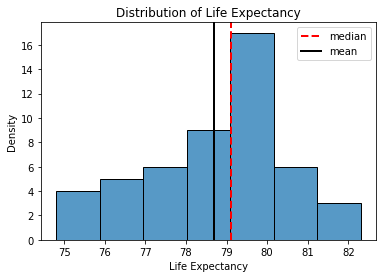

In [26]:
# Plot of the distribution of life expectancy
fig, ax = plt.subplots()
sns.histplot(total.LifeExp2018, ax=ax)
ax.set(title = "Distribution of Life Expectancy", xlabel = "Life Expectancy", ylabel = "Density")
ax.axvline(x=total.LifeExp2018.median(), color='red', label='median', linestyle='--', linewidth=2)
ax.axvline(x=total.LifeExp2018.mean(), color='black', label='mean', linewidth=2)
ax.legend();

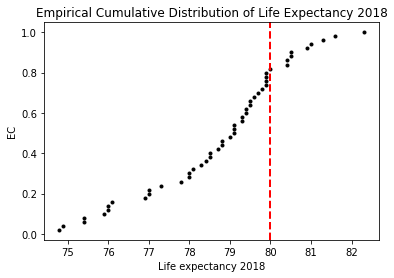

In [27]:
# Plot the empirical cumulative distribution function (ECtotal) of life expectancy
fig, ax = plt.subplots()
x = np.sort(total['LifeExp2018'])
y = np.arange(1, len(x)+1)/len(x)
ax.plot(x, y, '.', linestyle ='none', color='black')
ax.set(xlabel='Life expectancy 2018', ylabel='EC', title= 'Empirical Cumulative Distribution of Life Expectancy 2018')
ax.axvline(x=80, color='red', linestyle='--', linewidth=2);

### 3. Data Exploration: distribution of a single variable discriminating cases on a categorical variable

In [28]:
# Summary statistics groupped by region
total.groupby('Region')['LifeExp2018'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North Central,12.00,78.78,1.26,76.90,77.83,79.20,79.45,81.00
Northeast,9.00,79.91,0.99,78.30,79.50,79.90,80.50,81.30
South,16.00,77.09,1.75,74.80,75.78,76.55,78.58,80.00
West,13.00,79.76,1.22,78.10,78.80,79.80,80.40,82.30


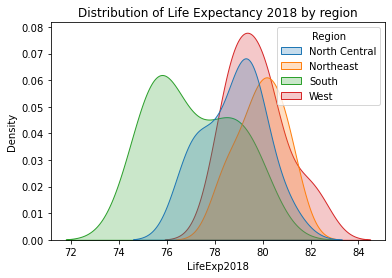

In [29]:
# KDE plot by the region
# kde plots of life expectancy per region
fig, ax = plt.subplots()
sns.kdeplot(data = total, x = "LifeExp2018", hue="Region", shade = True )
ax.set(title = "Distribution of Life Expectancy 2018 by region");

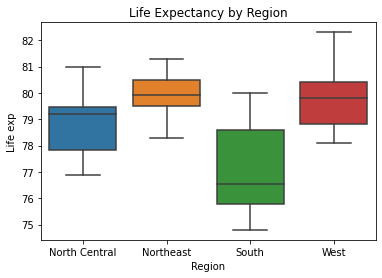

In [30]:
# box plots of life expectancy per region
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='Region',y='LifeExp2018',  data= total, ax = ax)
ax.set(title="Life Expectancy by Region", ylabel= "Life exp");

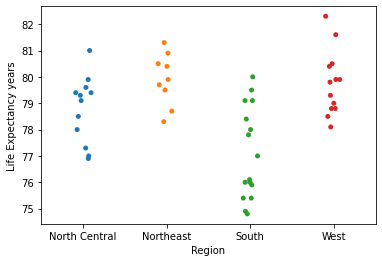

In [31]:
# Stripplots of life expectancy by region
fig, ax = plt.subplots(figsize=(6,4))
sns.stripplot(y='LifeExp2018', x='Region',  data=total, ax=ax)
ax.set(ylabel= "Life Expectancy years", xlabel= "Region");

### 4. Data Exploration: comparing distributions of several variables

In [32]:
# Basic statistics
total[['high_school','ba_degree','adv_degree']].describe()

,high_school,ba_degree,adv_degree
count,50.00,50.00,50.00
mean,88.51,30.11,11.26
std,3.49,5.06,2.70
min,76.70,19.90,7.80
25%,86.15,26.92,9.38
50%,89.25,29.45,10.70
75%,91.33,32.90,12.57
max,93.00,42.10,18.70


C:\Users\igord\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\igord\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\igord\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\igord\anaconda3\lib\site-packages\seaborn\distr

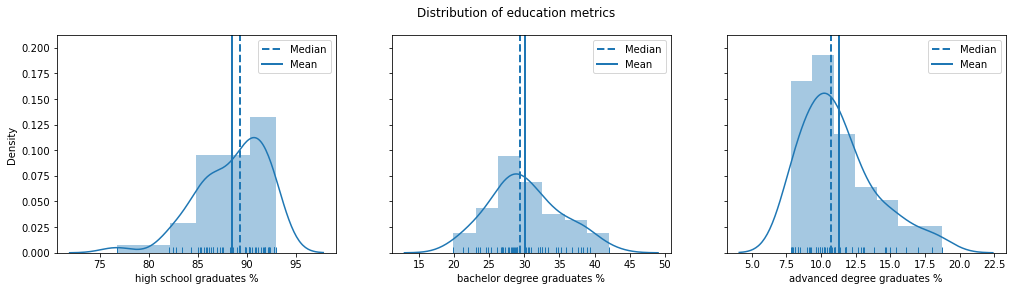

In [38]:
# Distributions of high school graduates, bachelor graduates, and advanced graduates across the states
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1,ncols = 3, sharey = True, figsize=(17, 4))
sns.distplot(total.high_school, ax=ax0, rug=True)
sns.distplot(total.ba_degree,ax= ax1, rug = True)
sns.distplot(total.adv_degree, ax=ax2, rug=True)
ax0.set(xlabel = "high school graduates %")
ax0.axvline(x=total.high_school.median(), label='Median', linestyle='--', linewidth=2)
ax0.axvline(x=total.high_school.mean(), label='Mean', linestyle='-', linewidth=2)
ax0.legend()

ax1.set(xlabel = "bachelor degree graduates %")
ax1.axvline(x=total.ba_degree.median(),  label='Median', linestyle='--', linewidth=2)
ax1.axvline(x=total.ba_degree.mean(),  label='Mean', linestyle='-', linewidth=2)
ax1.legend()

ax2.set(xlabel = "advanced degree graduates %")
ax2.axvline(x=total.adv_degree.median(), label='Median', linestyle='--', linewidth=2)
ax2.axvline(x=total.adv_degree.mean(),  label='Mean', linestyle='-', linewidth=2)
ax2.legend()

fig.suptitle("Distribution of education metrics")
plt.show()